In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/MyDrive/Test Project"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Test Project


# Setup Sample Data

In [61]:
import Prediction as p
import matplotlib.pyplot as plt
import cv2
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
MY_LAT = 33.77393309226053
MY_LONG = -84.3948788405901
MY_ORIENTATION = 300      # 0 degrees = North increases Clockwise

SAMPLE_IMAGE = "crosland_test.png"

# estimated photo loaction marked below

# Search Parameters set in LocationCalculation.py
# Search Radius: 130 m
# FoV: 120 Degrees (60 deg left + 60 deg right)

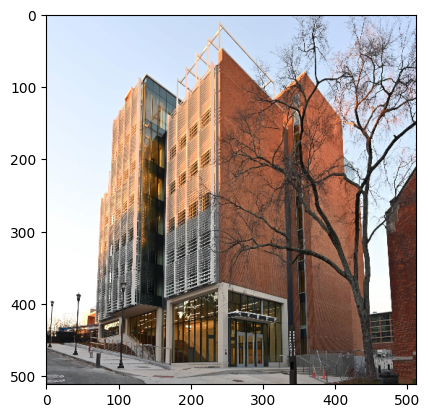

In [63]:
test_image = cv2.imread(SAMPLE_IMAGE)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (512, 512))

test_image = test_image - np.min(test_image, axis=(0, 1))
test_image = test_image / np.max(test_image, axis=(0, 1))

plt.imshow(test_image)

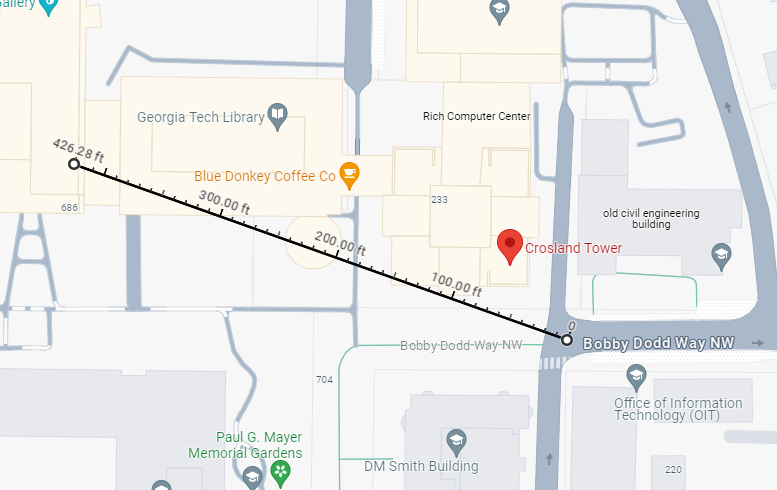

In [64]:
preds = p.predict(MY_LAT, MY_LONG, MY_ORIENTATION, SAMPLE_IMAGE)

Potential Buildings from GPS Data: ['Crosland', 'Price Gilbert', 'Skiles']


In [65]:
# each building is sorted by number of occurrences in the top 10 matches,
# best prediction is the one w/ most occurrences

# prediction return list of all potential matches, sorted in
# order of best (most occurrences) -> worst (least occurrences)

# Right Now

print(preds)

['Crosland', 'Skiles']


# Alternate Bad-Performing Example

In [49]:
MY_LAT = 33.772379572724645
MY_LONG = -84.39544273181176
MY_ORIENTATION = 340      # 0 degrees = North increases Clockwise

SAMPLE_IMAGE = "jscoon_test.png"

# estimated photo loaction marked below

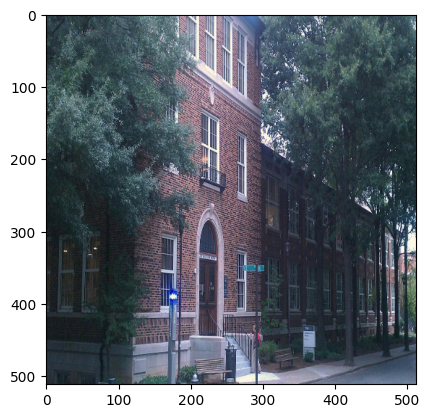

In [50]:
test_image = cv2.imread(SAMPLE_IMAGE)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (512, 512))

test_image = test_image - np.min(test_image, axis=(0, 1))
test_image = test_image / np.max(test_image, axis=(0, 1))

plt.imshow(test_image)

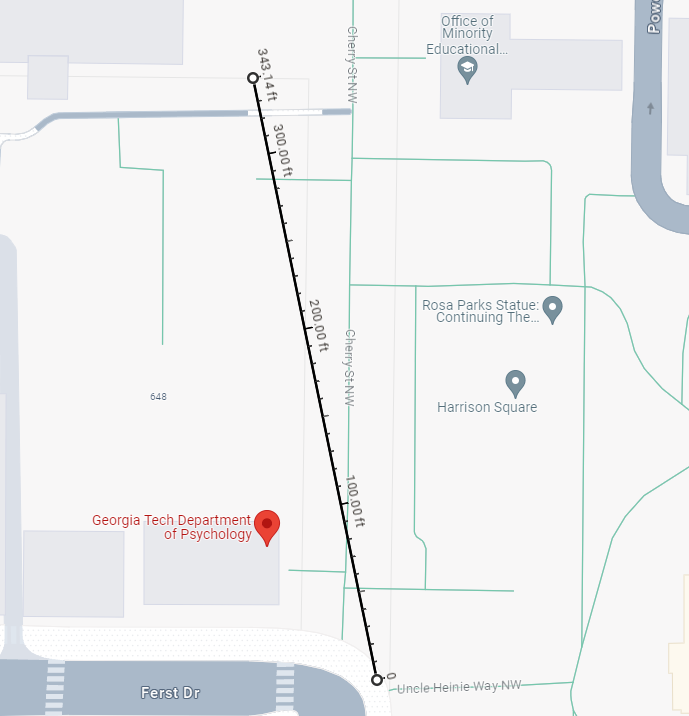

In [51]:
preds = p.predict(MY_LAT, MY_LONG, MY_ORIENTATION, SAMPLE_IMAGE)

Potential Buildings from GPS Data: ['Chapin', 'JS Coon']


In [53]:
print(preds)

# confuses Chapin w/ JS Coon (red brick buildings prob lol)
# fixed by turning down search radius from 130m -> 100m :,)

['Chapin', 'JS Coon']
